In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carga dos dados

In [2]:
df = pd.read_csv('dados-tratados/saudegov1920.csv', sep=';')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df.head(5)

,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,35-FEBRE,35-TOSSE,35-GARGANTA,35-DISPNEIA,35-DESC_RESP,35-SATURACAO,35-DIARREIA,35-VOMITO,35-OUTROS,36-PUERPERA,36-CARDIOPATI,36-HEMATOLOGI,36-SIND_DOWN,36-HEPATICA,36-ASMA,36-DIABETES,36-NEUROLOGIC,36-PNEUMOPATI,36-IMUNODEPRE,36-RENAL,36-OBESIDADE,36-OUTROS,VACINA,ANTIVIRAL,OUT_ANTIV,HOSPITAL,SG_UF_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,59-POS_IF_FLU,59-IF_VSR,59-IF_PARA1,59-IF_PARA2,59-IF_PARA3,59-IF_ADENO,59-IF_OUTRO,63-POS_PCRFLU,63-PCR_VSR,63-PCR_PARA1,63-PCR_PARA2,63-PCR_PARA3,63-PCR_PARA4,63-PCR_ADENO,63-PCR_METAP,63-PCR_BOCA,63-PCR_RINO,63-PCR_OUTRO,CLASSI_FIN,EVOLUCAO,63-PCR_SARS2,NomeArquivo,35-SINTOMAS,36-FATRISCO,59-IF,63-PCR
0,10/03/2020,11,GO,520870,M,35,6,NaN,1.0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,GO,0,NaN,NaN,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0,INFLU20-04052020.csv,111110001,0,0,0
1,01/04/2020,14,GO,520870,F,84,5,NaN,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,NaN,1,GO,1,07/04/2020,NaN,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,INFLU20-04052020.csv,10110001,1,0,0
2,15/03/2020,12,MG,311930,M,32,6,1.0,2.0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,MG,0,NaN,NaN,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,NaN,0,INFLU20-04052020.csv,110011001,0,0,0
3,21/03/2020,12,GO,520110,F,55,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,GO,0,NaN,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0,INFLU20-04052020.csv,111111000,0,0,0
4,14/03/2020,11,MG,316720,M,54,6,4.0,1.0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,MG,0,NaN,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,9.0,0,INFLU20-04052020.csv,110111000,0,0,0


# Dados do Dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148085 entries, 0 to 148084
Data columns (total 69 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DT_SIN_PRI     148085 non-null  object 
 1   SEM_PRI        148085 non-null  int64  
 2   SG_UF_NOT      148085 non-null  object 
 3   CO_MUN_NOT     148085 non-null  int64  
 4   CS_SEXO        148085 non-null  object 
 5   NU_IDADE_N     148085 non-null  int64  
 6   CS_GESTANT     148085 non-null  int64  
 7   CS_RACA        129981 non-null  float64
 8   CS_ZONA        136814 non-null  float64
 9   SURTO_SG       148085 non-null  int64  
 10  NOSOCOMIAL     148085 non-null  int64  
 11  AVE_SUINO      148085 non-null  int64  
 12  35-FEBRE       148085 non-null  int64  
 13  35-TOSSE       148085 non-null  int64  
 14  35-GARGANTA    148085 non-null  int64  
 15  35-DISPNEIA    148085 non-null  int64  
 16  35-DESC_RESP   148085 non-null  int64  
 17  35-SATURACAO   148085 non-nul

# Seleção de campos e registros para treinamento.

### Seleção de campos - Novo Dataset

In [5]:
df_1 = df.drop(['DT_SIN_PRI','OUT_ANTIV','DT_ENTUTI','DT_SAIDUTI','NomeArquivo','UTI','SUPORT_VEN'],axis=1)
df_1 = df_1.drop(['63-PCR','35-SINTOMAS','36-FATRISCO','59-IF'],axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148085 entries, 0 to 148084
Data columns (total 58 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEM_PRI        148085 non-null  int64  
 1   SG_UF_NOT      148085 non-null  object 
 2   CO_MUN_NOT     148085 non-null  int64  
 3   CS_SEXO        148085 non-null  object 
 4   NU_IDADE_N     148085 non-null  int64  
 5   CS_GESTANT     148085 non-null  int64  
 6   CS_RACA        129981 non-null  float64
 7   CS_ZONA        136814 non-null  float64
 8   SURTO_SG       148085 non-null  int64  
 9   NOSOCOMIAL     148085 non-null  int64  
 10  AVE_SUINO      148085 non-null  int64  
 11  35-FEBRE       148085 non-null  int64  
 12  35-TOSSE       148085 non-null  int64  
 13  35-GARGANTA    148085 non-null  int64  
 14  35-DISPNEIA    148085 non-null  int64  
 15  35-DESC_RESP   148085 non-null  int64  
 16  35-SATURACAO   148085 non-null  int64  
 17  35-DIARREIA    148085 non-nul

In [6]:
print('Dataset: Inicial')
df_1.head()

Dataset: Inicial


,SEM_PRI,SG_UF_NOT,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,35-FEBRE,35-TOSSE,35-GARGANTA,35-DISPNEIA,35-DESC_RESP,35-SATURACAO,35-DIARREIA,35-VOMITO,35-OUTROS,36-PUERPERA,36-CARDIOPATI,36-HEMATOLOGI,36-SIND_DOWN,36-HEPATICA,36-ASMA,36-DIABETES,36-NEUROLOGIC,36-PNEUMOPATI,36-IMUNODEPRE,36-RENAL,36-OBESIDADE,36-OUTROS,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,59-POS_IF_FLU,59-IF_VSR,59-IF_PARA1,59-IF_PARA2,59-IF_PARA3,59-IF_ADENO,59-IF_OUTRO,63-POS_PCRFLU,63-PCR_VSR,63-PCR_PARA1,63-PCR_PARA2,63-PCR_PARA3,63-PCR_PARA4,63-PCR_ADENO,63-PCR_METAP,63-PCR_BOCA,63-PCR_RINO,63-PCR_OUTRO,CLASSI_FIN,EVOLUCAO,63-PCR_SARS2
0,11,GO,520870,M,35,6,NaN,1.0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
1,14,GO,520870,F,84,5,NaN,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0
2,12,MG,311930,M,32,6,1.0,2.0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,MG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,NaN,0
3,12,GO,520110,F,55,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
4,11,MG,316720,M,54,6,4.0,1.0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,MG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,9.0,0


### Remoção dos registros SRAG por outro agente Etiológico¶¶

In [7]:
df_1 = df_1[df_1['CLASSI_FIN'] != 3]

### Remoção dos registros CS_SEXO = I - IGNORADO¶

In [8]:
df_1 = df_1[df_1['CS_SEXO'] != 'I']

### Avaliação do equilíbrio das classes

In [9]:
print('Quantidade de valores possíveis para y:')
print('Evolucao:', df_1['EVOLUCAO'].unique())
print('Cura',df_1[df_1['EVOLUCAO'] == 1]['EVOLUCAO'].count())
print('Obito',df_1[df_1['EVOLUCAO'] == 2]['EVOLUCAO'].count())
print('Ignorado',df_1[df_1['EVOLUCAO'] == 9]['EVOLUCAO'].count())

Quantidade de valores possíveis para y:
Evolucao: [ 1. nan  9.  2.]
Cura 68983
Obito 19745
Ignorado 5330


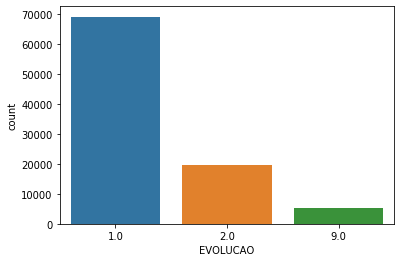

In [10]:
sns.countplot(df_1.EVOLUCAO)

### Remoção dos registros nulos

In [11]:
print('Total de nulos do novo Dataset:')
df_1.isna().sum()

Total de nulos do novo Dataset:


SEM_PRI              0
SG_UF_NOT            0
CO_MUN_NOT           0
CS_SEXO              0
NU_IDADE_N           0
CS_GESTANT           0
CS_RACA          18070
CS_ZONA          11243
SURTO_SG             0
NOSOCOMIAL           0
AVE_SUINO            0
35-FEBRE             0
35-TOSSE             0
35-GARGANTA          0
35-DISPNEIA          0
35-DESC_RESP         0
35-SATURACAO         0
35-DIARREIA          0
35-VOMITO            0
35-OUTROS            0
36-PUERPERA          0
36-CARDIOPATI        0
36-HEMATOLOGI        0
36-SIND_DOWN         0
36-HEPATICA          0
36-ASMA              0
36-DIABETES          0
36-NEUROLOGIC        0
36-PNEUMOPATI        0
36-IMUNODEPRE        0
36-RENAL             0
36-OBESIDADE         0
36-OUTROS            0
VACINA               0
ANTIVIRAL            0
HOSPITAL             0
SG_UF_INTE       16986
59-POS_IF_FLU        0
59-IF_VSR            0
59-IF_PARA1          0
59-IF_PARA2          0
59-IF_PARA3          0
59-IF_ADENO          0
59-IF_OUTRO

In [12]:
df_1 = df_1.dropna()
df_1.info()
df_1.reset_index(inplace=True, drop=True)
df_1.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74224 entries, 3 to 148083
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEM_PRI        74224 non-null  int64  
 1   SG_UF_NOT      74224 non-null  object 
 2   CO_MUN_NOT     74224 non-null  int64  
 3   CS_SEXO        74224 non-null  object 
 4   NU_IDADE_N     74224 non-null  int64  
 5   CS_GESTANT     74224 non-null  int64  
 6   CS_RACA        74224 non-null  float64
 7   CS_ZONA        74224 non-null  float64
 8   SURTO_SG       74224 non-null  int64  
 9   NOSOCOMIAL     74224 non-null  int64  
 10  AVE_SUINO      74224 non-null  int64  
 11  35-FEBRE       74224 non-null  int64  
 12  35-TOSSE       74224 non-null  int64  
 13  35-GARGANTA    74224 non-null  int64  
 14  35-DISPNEIA    74224 non-null  int64  
 15  35-DESC_RESP   74224 non-null  int64  
 16  35-SATURACAO   74224 non-null  int64  
 17  35-DIARREIA    74224 non-null  int64  
 18  35-VO

,SEM_PRI,SG_UF_NOT,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,35-FEBRE,35-TOSSE,35-GARGANTA,35-DISPNEIA,35-DESC_RESP,35-SATURACAO,35-DIARREIA,35-VOMITO,35-OUTROS,36-PUERPERA,36-CARDIOPATI,36-HEMATOLOGI,36-SIND_DOWN,36-HEPATICA,36-ASMA,36-DIABETES,36-NEUROLOGIC,36-PNEUMOPATI,36-IMUNODEPRE,36-RENAL,36-OBESIDADE,36-OUTROS,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,59-POS_IF_FLU,59-IF_VSR,59-IF_PARA1,59-IF_PARA2,59-IF_PARA3,59-IF_ADENO,59-IF_OUTRO,63-POS_PCRFLU,63-PCR_VSR,63-PCR_PARA1,63-PCR_PARA2,63-PCR_PARA3,63-PCR_PARA4,63-PCR_ADENO,63-PCR_METAP,63-PCR_BOCA,63-PCR_RINO,63-PCR_OUTRO,CLASSI_FIN,EVOLUCAO,63-PCR_SARS2
0,12,GO,520110,F,55,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
1,11,MG,316720,M,54,6,4.0,1.0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,MG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,9.0,0
2,16,MG,310020,M,5,6,1.0,1.0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,MG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
3,1,PA,150140,F,43,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,PA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
4,9,PA,150140,F,44,5,4.0,1.0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,PA,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0


### Label encode

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#SG_UF_NOT
le.fit(df_1.SG_UF_NOT)
print('classes SG_UF_NOT:',le.classes_)
df_1.SG_UF_NOT = le.transform(df_1.SG_UF_NOT)

#CS_SEXO
le.fit(df_1.CS_SEXO)
print('classes CS_SEXO:',le.classes_)
df_1.CS_SEXO = le.transform(df_1.CS_SEXO)

#SG_UF_INTE
le.fit(df_1.SG_UF_INTE)
print('classes SG_UF_INTE:',le.classes_)
df_1.SG_UF_INTE = le.transform(df_1.SG_UF_INTE)


df_1.head()


classes SG_UF_NOT: ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
classes CS_SEXO: ['F' 'M']
classes SG_UF_INTE: ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


,SEM_PRI,SG_UF_NOT,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,35-FEBRE,35-TOSSE,35-GARGANTA,35-DISPNEIA,35-DESC_RESP,35-SATURACAO,35-DIARREIA,35-VOMITO,35-OUTROS,36-PUERPERA,36-CARDIOPATI,36-HEMATOLOGI,36-SIND_DOWN,36-HEPATICA,36-ASMA,36-DIABETES,36-NEUROLOGIC,36-PNEUMOPATI,36-IMUNODEPRE,36-RENAL,36-OBESIDADE,36-OUTROS,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,59-POS_IF_FLU,59-IF_VSR,59-IF_PARA1,59-IF_PARA2,59-IF_PARA3,59-IF_ADENO,59-IF_OUTRO,63-POS_PCRFLU,63-PCR_VSR,63-PCR_PARA1,63-PCR_PARA2,63-PCR_PARA3,63-PCR_PARA4,63-PCR_ADENO,63-PCR_METAP,63-PCR_BOCA,63-PCR_RINO,63-PCR_OUTRO,CLASSI_FIN,EVOLUCAO,63-PCR_SARS2
0,12,8,520110,0,55,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
1,11,10,316720,1,54,6,4.0,1.0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,9.0,0
2,16,10,310020,1,5,6,1.0,1.0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
3,1,13,150140,0,43,5,4.0,1.0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,1.0,0
4,9,13,150140,0,44,5,4.0,1.0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0


### Verificação e remoção dos registros com valor 'Ignorado'

In [14]:
print('Evolucao:', df_1['EVOLUCAO'].unique())
print('Cura',df_1[df_1['EVOLUCAO'] == 1]['EVOLUCAO'].count())
print('Obito',df_1[df_1['EVOLUCAO'] == 2]['EVOLUCAO'].count())
print('Ignorado',df_1[df_1['EVOLUCAO'] == 9]['EVOLUCAO'].count())


Evolucao: [1. 9. 2.]
Cura 57054
Obito 13264
Ignorado 3906


In [15]:
df_1 = df_1.drop(df_1[df_1['EVOLUCAO'] == 9].index, axis=0)

# Preparação para o treinamento do dataset

In [16]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split


### Separação dos dados de validação

In [17]:
print('20% Dados de validação')

#Embaralha os dados
#df_1 = df_1.sample(frac=1).reset_index(drop=True)

vinte = int(round((df_1.count()['SEM_PRI']) * 0.2))

print(vinte)

df_3 = df_1.iloc[vinte:,:]
df_val =df_1.iloc[:vinte,:]

X_val = df_val.drop(['EVOLUCAO'], axis=1)
y_val = df_val['EVOLUCAO']

print('shape validação:',df_val.shape)
print('shape restante dos dados:',df_3.shape)

20% Dados de validação
14064
shape validação: (14064, 58)
shape restante dos dados: (56254, 58)


## Métodos de balanceamento das classes

### Under sampling

Random under-sampling:
2.0    9590
1.0    9590
Name: EVOLUCAO, dtype: int64


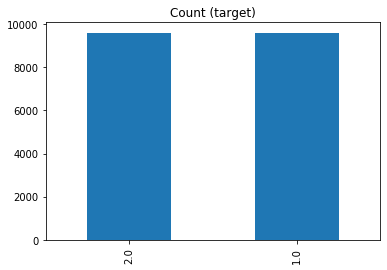

In [18]:
qtd_classe_1, qtd_classe_2 = df_3.EVOLUCAO.value_counts()

df_classe_1 = df_3[df_3['EVOLUCAO'] == 1]
df_classe_2 = df_3[df_3['EVOLUCAO'] == 2]


df_classe_1_under = df_classe_1.sample(qtd_classe_2)
df_test_under = pd.concat([df_classe_1_under, df_classe_2], axis=0)

print('Random under-sampling:')
print(df_test_under.EVOLUCAO.value_counts())

df_test_under.EVOLUCAO.value_counts().plot(kind='bar', title='Count (target)');

### Over sampling

Random over-sampling:
2.0    46664
1.0    46664
Name: EVOLUCAO, dtype: int64


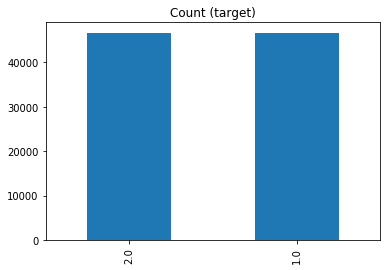

In [19]:
df_classe_2_over = df_classe_2.sample(qtd_classe_1, replace=True)
df_test_over = pd.concat([df_classe_1, df_classe_2_over], axis=0)

print('Random over-sampling:')
print(df_test_over.EVOLUCAO.value_counts())

df_test_over.EVOLUCAO.value_counts().plot(kind='bar', title='Count (target)')

### Escolha do método de balanceamento

In [20]:
#df_4 = df_test_under
df_4 = df_test_over
#df_4 = df_3

df_4.reset_index(inplace=True, drop=True)
df_4.shape

(93328, 58)

### Separação dos atributos (features) da classe

In [21]:
X = df_4.drop(['EVOLUCAO'], axis=1)
y = df_4['EVOLUCAO']

X_1 = X
y_1 = y

X = X.values
y = y.values

# Avaliação do melhor modelo

### Executa validação cruzada para estimar a habilidade de predição de cada modelo.

#### Métodos de suporte

In [22]:
def exec_avaliacao(X_train, X_test,y_train,y_test, modelo):
    aval = []
    modelo.fit(X_train,y_train)
    y_predict = modelo.predict(X_test)

    aval.append([accuracy_score(y_test, y_predict), 
                     roc_auc_score(y_test, y_predict),
                     f1_score(y_test,y_predict), 
                     recall_score(y_test, y_predict),
                     precision_score(y_test, y_predict),0])

    return y_predict, aval


In [23]:
def avaliacao(X, y, dtc, gbc, rfc, exibir_resultados):
    #conj_dados=0
    aval_gbc = []
    aval_dtc = []
    aval_rfc = []
    conj_dados = 0

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
    
    for train_index, test_index in skf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tipo = 'TREINO/TESTE'

        if dtc != None :
            y_predict, aval_dtc = exec_avaliacao(X_train, X_test, y_train, y_test, dtc)  
            if exibir_resultados:
                imprime_scores(tipo, conj_dados, aval_dtc, 'DTC')           
                imprime_matriz_confusao(y_test, y_predict)
            
        if gbc != None :
            y_predict, aval_gbc = exec_avaliacao(X_train, X_test, y_train, y_test, dtc)  
            if exibir_resultados:
                imprime_scores(tipo, conj_dados, aval_gbc, 'GBC')
                imprime_matriz_confusao(y_test, y_predict)
            
        if rfc != None :
            y_predict, aval_rfc = exec_avaliacao(X_train, X_test, y_train, y_test, dtc)  
            if exibir_resultados:
                imprime_scores(tipo, conj_dados, aval_rfc, 'RFC')           
                imprime_matriz_confusao(y_test, y_predict)
                
        conj_dados +=1
        
    return aval_gbc, aval_dtc, aval_rfc

In [24]:
def imprime_scores(tipo, conj_dados, aval, name_mod):
    print('--------------------------------')    
    print('SCORE DOS DADOS DE', tipo , ', MODELO :', name_mod, 'PASSO:', conj_dados )    
    print('--------------------------------')    
    print('acurácia : ', aval[0][0])
    print('roc :', aval[0][1])
    print('f1-score :', aval[0][2])
    print('recall score :', aval[0][3])
    print('precision score :', aval[0][4])
    

In [25]:
def imprime_matriz_confusao(y, y_predict):
    print(confusion_matrix(y, y_predict))

In [26]:
def imprime_parametros(list_aval, modelo, indices):
    aval_acuracia = []
    aval_roc = []
    aval_f1 = []
    aval_recall = []
    aval_precisao = []
    
    print('--------------[PARAMETROS  - ', modelo,']---------------')
    print(list_aval)
    aval_acuracia = list_aval[indices['ACURACIA']]
    print('ACURÁCIA :', aval_acuracia[0][5])
    aval_roc = list_aval[indices['ROC']]
    print('ROC :', aval_roc[0][5])
    aval_f1 = list_aval[indices['F1']]
    print('F1-SCORE :', aval_f1[0][5])
    aval_recall = list_aval[indices['RECALL']]
    print('RECALL :', aval_recall[0][5])
    aval_precisao = list_aval[indices['PRECISAO']]
    print('PRECISAO :', aval_precisao[0][5])
    print('----------------------------------')

In [27]:
def testa_modelo_diferentes_parametros(X_train, X_test, y_train, y_test, modelo):
    params = dict()
    contador = 0
    
    lista = []
    
    params['random_state'] = 42
    
    for i in np.arange(0.1, 2, 0.2):
        params['learning_rate'] = i
        for j in range(17,25, 2):
            params['max_features'] = j
            for k in range(7,12, 2):
                params['max_depth'] = k
                for l in range(250,300, 10):
                    params['n_estimators'] = l

                    modelo.set_params(**params)

                    aval = []

                    _,aval = exec_avaliacao(X_train, X_test,y_train,y_test, modelo)

                    aval[0][5] = params

                    lista.append(aval)

                    print('--------------------------------')    
                    print('STEP : ', contador)    
                    print('--------------------------------')    
                    contador+=1

    return lista

# {'learning_rate': 1.7000000000000002, 'max_features': 20, 'max_depth': 9, 'n_estimators': 250}
# {'learning_rate': 0.91, 'max_features': 20, 'max_depth': 8, 'n_estimators': 250}

In [28]:
def plot_recall_curve(X, y, y_prev, classifier):
    average_precision = average_precision_score(y, y_prev)
    disp = plot_precision_recall_curve(classifier, X, y)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(average_precision))

In [29]:
def melhores_resultados(list_aval, modelo):

    acuracia, roc, f1, recall, precisao, parametros = scores_melhores_resultados(list_aval)
    imprime_scores('ACURÁCIA', 0, list_aval[acuracia['indice']], modelo)           
    imprime_scores('ROC', 0, list_aval[roc['indice']], modelo)
    imprime_scores('F1-SCORE', 0, list_aval[f1['indice']], modelo) 
    imprime_scores('RECALL', 0, list_aval[recall['indice']], modelo)
    imprime_scores('PRECISÃO', 0, list_aval[precisao['indice']], modelo)
    indices = [acuracia['indice'], roc['indice'], f1['indice'], recall['indice'], precisao['indice']]
    imprime_parametros(list_aval, modelo, parametros)

In [30]:
def scores_melhores_resultados(list_aval):
    acuracia = dict()
    roc = dict()
    f1 = dict()
    recall = dict()
    precisao = dict()
    parametro = dict()
    
    acuracia['valor']  = 0
    acuracia['indice'] = 0
    roc['valor']       = 0
    roc['indice']      = 0
    f1['valor']        = 0
    f1['indice']       = 0
    recall['valor']    = 0
    recall['indice']   = 0
    precisao['valor']  = 0
    precisao['indice'] = 0

    
    for i in range(len(list_aval)):
        if acuracia['valor'] < list_aval[i][0][0] :
            acuracia['valor'] = list_aval[i][0][0]
            acuracia['indice'] = i
            parametro['ACURACIA'] = i

        if roc['valor'] < list_aval[i][0][1] :
            roc['valor'] = list_aval[i][0][1]
            roc['indice'] = i
            parametro['ROC'] = i

        if f1['valor'] < list_aval[i][0][2] :
            f1['valor'] = list_aval[i][0][2]
            f1['indice'] = i
            parametro['F1'] = i

        if recall['valor'] < list_aval[i][0][3] :
            recall['valor'] = list_aval[i][0][3]
            recall['indice'] = i
            parametro['RECALL'] = i

        if precisao['valor'] < list_aval[i][0][4] :
            precisao['valor'] = list_aval[i][0][4]
            precisao['indice'] = i
            parametro['PRECISAO'] = i

    return acuracia, roc, f1, recall, precisao, parametro

### Escolhe melhor classificador

In [31]:
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()   

params_gbc=  {'random_state': 42, 'learning_rate': 0.5, 'max_features': 23, 'max_depth': 8, 'n_estimators': 290}
gbc.set_params(**params_gbc)

params_rfc=  {'random_state': 42, 'max_features': 23, 'max_depth': 8, 'n_estimators': 290}
rfc.set_params(**params_rfc)


aval_model_gbc = []
aval_model_dtc = []
aval_model_rfc = []

aval_model_gbc, aval_model_dtc, aval_model_rfc = avaliacao(X, y, dtc, gbc, rfc, True)


--------------------------------
SCORE DOS DADOS DE TREINO/TESTE , MODELO : DTC PASSO: 0
--------------------------------
acurácia :  0.9229079609986071
roc : 0.9229079609986071
f1-score : 0.9174175035868006
recall score : 0.8564234436944177
precision score : 0.9877656945130994
[[7993 1340]
 [  99 9234]]
--------------------------------
SCORE DOS DADOS DE TREINO/TESTE , MODELO : GBC PASSO: 0
--------------------------------
acurácia :  0.9240865745205186
roc : 0.9240865745205187
f1-score : 0.9188477177710327
recall score : 0.8595306975249116
precision score : 0.9869586614173228
[[8022 1311]
 [ 106 9227]]
--------------------------------
SCORE DOS DADOS DE TREINO/TESTE , MODELO : RFC PASSO: 0
--------------------------------
acurácia :  0.9231758277081324
roc : 0.9231758277081323
f1-score : 0.9178223495702005
recall score : 0.8580306439515697
precision score : 0.9865713933719354
[[8008 1325]
 [ 109 9224]]
--------------------------------
SCORE DOS DADOS DE TREINO/TESTE , MODELO : DTC PA

### Ajusta hiperparâmetros

In [32]:
#gbc = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
#list_aval_gbc = testa_modelo_diferentes_parametros(X_train, X_test, y_train, y_test, gbc)


In [33]:
#modelo = 'GBC'
#melhores_resultados(list_aval_gbc, modelo)   

In [34]:
#                cura                   óbito
# 
#previu cura     a= cura correta        b = óbito que era cura
#previu óbito    c= cura que era óbito  d = óbito correto
# Acurácia = (a + d) / (b + c) 
# Precisão = a / a + c = acurácia da cura
#            b / b + d = acurácia do óbito
# Recall   = a / a + b = 
# Roc      = 
# F1 Score = 

### Validando o melhor modelo.

In [35]:
rfc = RandomForestClassifier()
aval_model = []

params_rfc=  {'random_state': 42, 'max_depth': 8, 'max_features':30,'n_estimators': 290}
gbc.set_params(**params_gbc)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_predict, aval_model = exec_avaliacao(X_train, X_val, y_train, y_val, rfc)

imprime_scores('VALIDAÇÃO', 0, aval_model, 'Random Forest Classifier')
imprime_matriz_confusao(y_val, y_predict)

--------------------------------
SCORE DOS DADOS DE VALIDAÇÃO , MODELO : Random Forest Classifier PASSO: 0
--------------------------------
acurácia :  0.7591723549488054
roc : 0.7196570809732359
f1-score : 0.8311649469119187
recall score : 0.8024061597690086
precision score : 0.862061834350119
[[8337 2053]
 [1334 2340]]


### Avaliação dos atributos

(93328, 57)
Feature: SEM_PRI, Score: 0.09545
Feature: SG_UF_NOT, Score: 0.03591
Feature: CO_MUN_NOT, Score: 0.08891
Feature: CS_SEXO, Score: 0.01623
Feature: NU_IDADE_N, Score: 0.24573
Feature: CS_GESTANT, Score: 0.02050
Feature: CS_RACA, Score: 0.03378
Feature: CS_ZONA, Score: 0.00859
Feature: SURTO_SG, Score: 0.01027
Feature: NOSOCOMIAL, Score: 0.00428
Feature: AVE_SUINO, Score: 0.00299
Feature: 35-FEBRE, Score: 0.01545
Feature: 35-TOSSE, Score: 0.02310
Feature: 35-GARGANTA, Score: 0.01514
Feature: 35-DISPNEIA, Score: 0.01414
Feature: 35-DESC_RESP, Score: 0.01549
Feature: 35-SATURACAO, Score: 0.03344
Feature: 35-DIARREIA, Score: 0.01119
Feature: 35-VOMITO, Score: 0.01170
Feature: 35-OUTROS, Score: 0.01767
Feature: 36-PUERPERA, Score: 0.00139
Feature: 36-CARDIOPATI, Score: 0.02627
Feature: 36-HEMATOLOGI, Score: 0.00297
Feature: 36-SIND_DOWN, Score: 0.00269
Feature: 36-HEPATICA, Score: 0.00279
Feature: 36-ASMA, Score: 0.00742
Feature: 36-DIABETES, Score: 0.01970
Feature: 36-NEUROLOGIC,

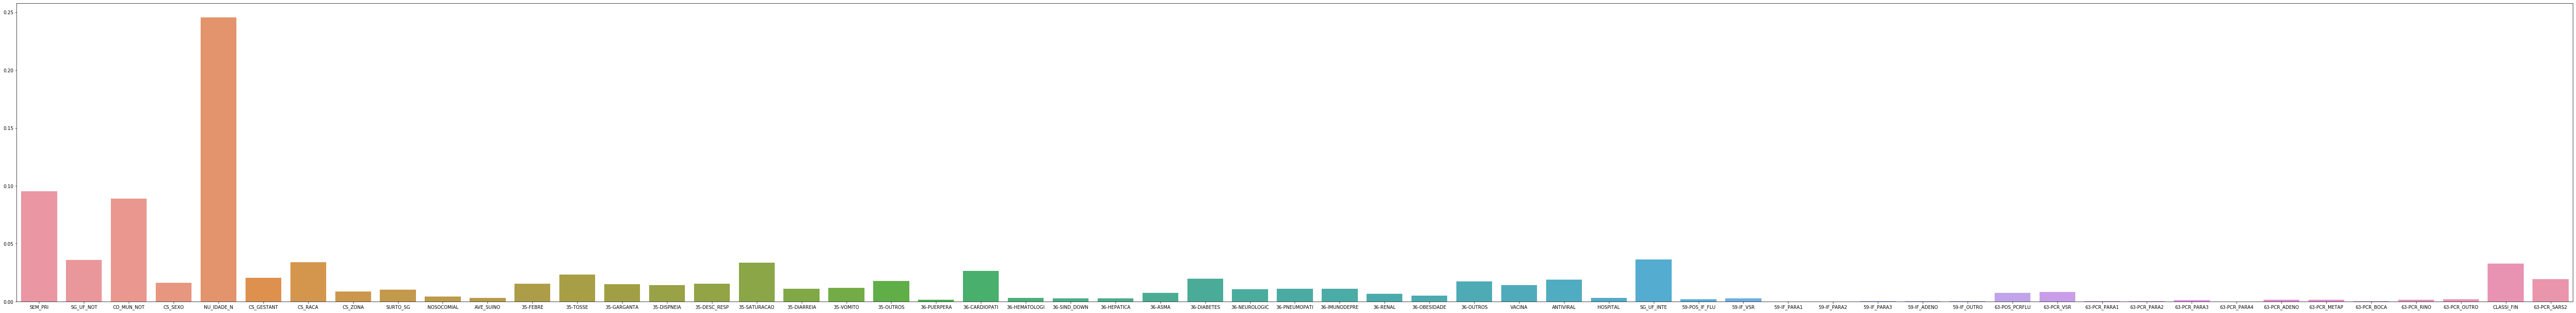

In [36]:
plt.figure(figsize = (100, 12))
importance = rfc.feature_importances_
print(X_1.shape)
for i,v in zip(df_4.columns, importance):
    print('Feature: %0s, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot(X_1.columns, importance)


# Outras análises

#### Nota-se em proporção que a letalidade da COVID é maior que a dos outros agentes.

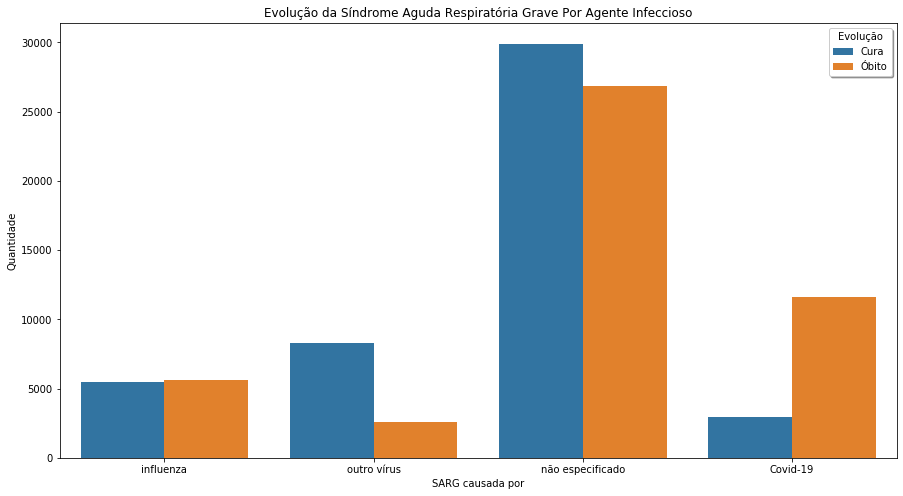

In [37]:
plt.rcParams["figure.figsize"] = (15, 8)

fig, ax = plt.subplots()
sns.countplot(df_4.CLASSI_FIN, hue=df_4.EVOLUCAO).set_title('Evolução da Síndrome Aguda Respiratória Grave Por Agente Infeccioso')
new_labels = ['Doença', 'Quantidade']
plt.legend(title='Evolução', loc='upper right', labels=['Cura', 'Óbito'], shadow=True)

xlabels = ["influenza", "outro vírus", "não especificado", "Covid-19"]

ax.set_xticklabels(xlabels)
#plt.xticks(rotation=45)

ax.set_xlabel('SARG causada por')
ax.set_ylabel('Quantidade')
plt.show()


#### Considerando-se todos os agentes, o índice de contágio é maior até os 10 anos, porém a taxa de óbitos fica notoriamente maior que a de cura a partir dos 40 anos.

Text(0, 0.5, 'Quantidade')

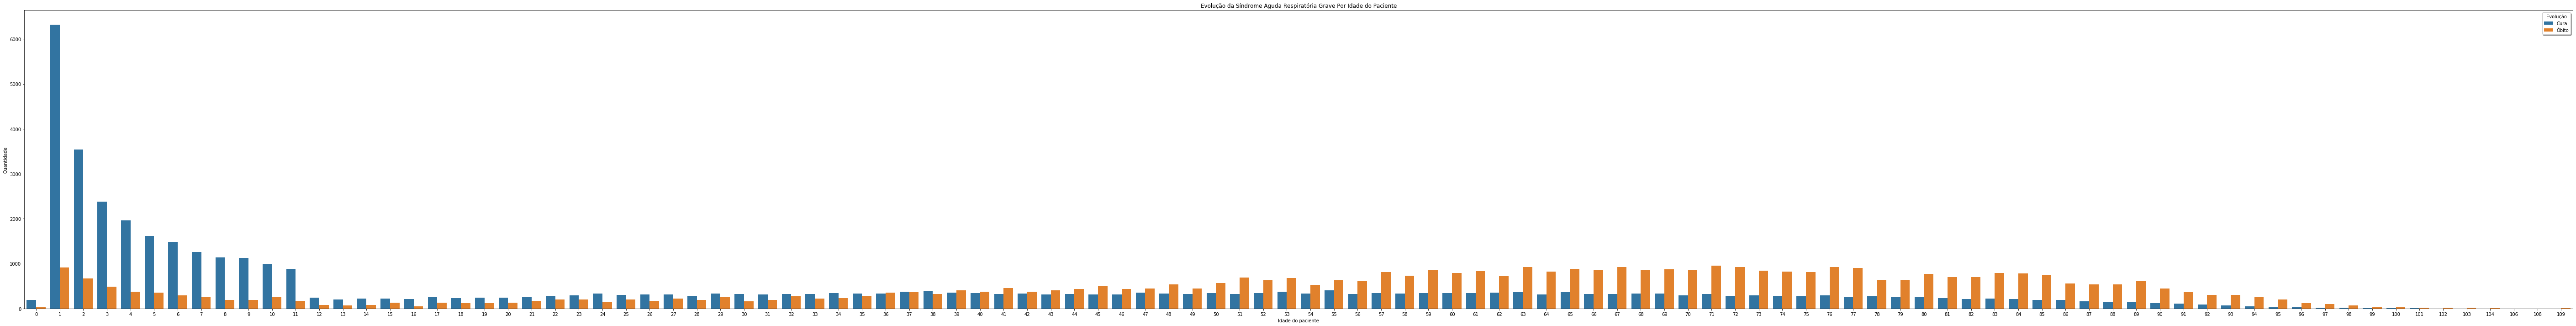

In [38]:
plt.rcParams["figure.figsize"] = (100, 12)

fig, ax = plt.subplots()
sns.countplot(df_4.NU_IDADE_N, hue=df_4.EVOLUCAO).set_title('Evolução da Síndrome Aguda Respiratória Grave Por Idade do Paciente')

plt.legend(title='Evolução', loc='upper right', labels=['Cura', 'Óbito'], shadow=True)

ax.set_xlabel('Idade do paciente')
ax.set_ylabel('Quantidade')



#### Considerando-se todos os agentes, o índice de casos é maior entre as semanas 12 e 17, entre março e abril. Coincidentemente período próximo ao carnaval. Também o maior índice de casos letais.

Text(0, 0.5, 'Quantidade')

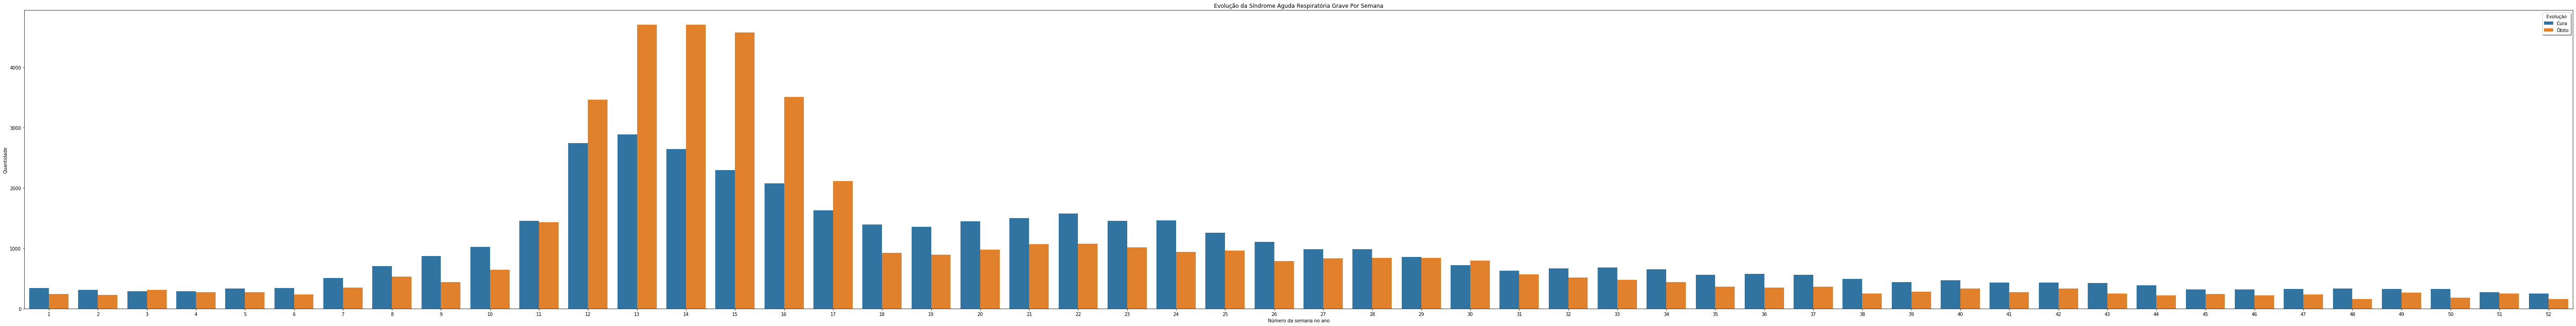

In [39]:
plt.rcParams["figure.figsize"] = (100, 12)
fig, ax = plt.subplots()
sns.countplot(df_4.SEM_PRI, hue=df_4.EVOLUCAO).set_title('Evolução da Síndrome Aguda Respiratória Grave Por Semana')
plt.legend(title='Evolução', loc='upper right', labels=['Cura', 'Óbito'], shadow=True)

ax.set_xlabel('Número da semana no ano')
ax.set_ylabel('Quantidade')


#### Considerando-se todos os agentes, Rio e São Paulo são os estados que têem maior número de óbitos que cura em proporção.

Text(0, 0.5, 'Quantidade')

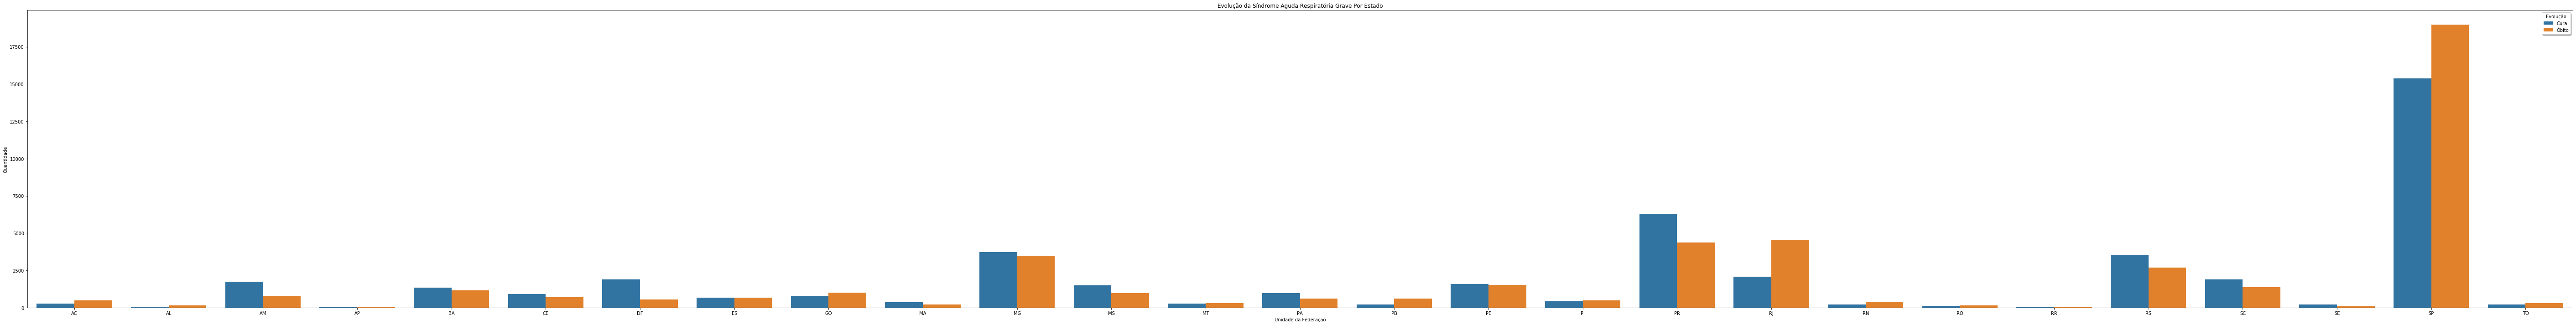

In [40]:
plt.rcParams["figure.figsize"] = (100, 12)

fig, ax = plt.subplots()
sns.countplot(df_4.SG_UF_NOT, hue=df_4.EVOLUCAO).set_title('Evolução da Síndrome Aguda Respiratória Grave Por Estado')

list_labels=[]
for x in ax.get_xticklabels():
    list_labels.append(int(x.get_text()))

    
xlabels = le.inverse_transform(list_labels)

ax.set_xticklabels(xlabels)

plt.legend(title='Evolução', loc='upper right', labels=['Cura', 'Óbito'], shadow=True)

ax.set_xlabel('Unidade da Federação')
ax.set_ylabel('Quantidade')


## Análises específcas sobre a COVID-19

In [41]:
df_covid = df_4[df_4.CLASSI_FIN == 5]

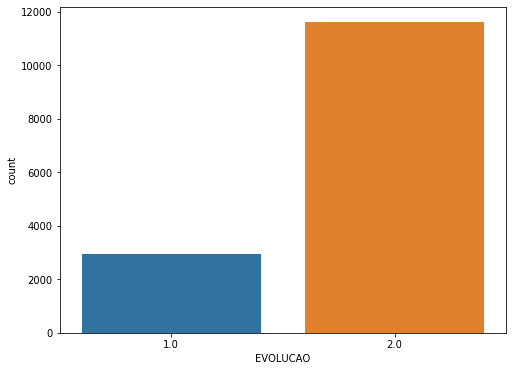

In [42]:
plt.figure(figsize = (8, 6))
sns.countplot(df_covid.EVOLUCAO)

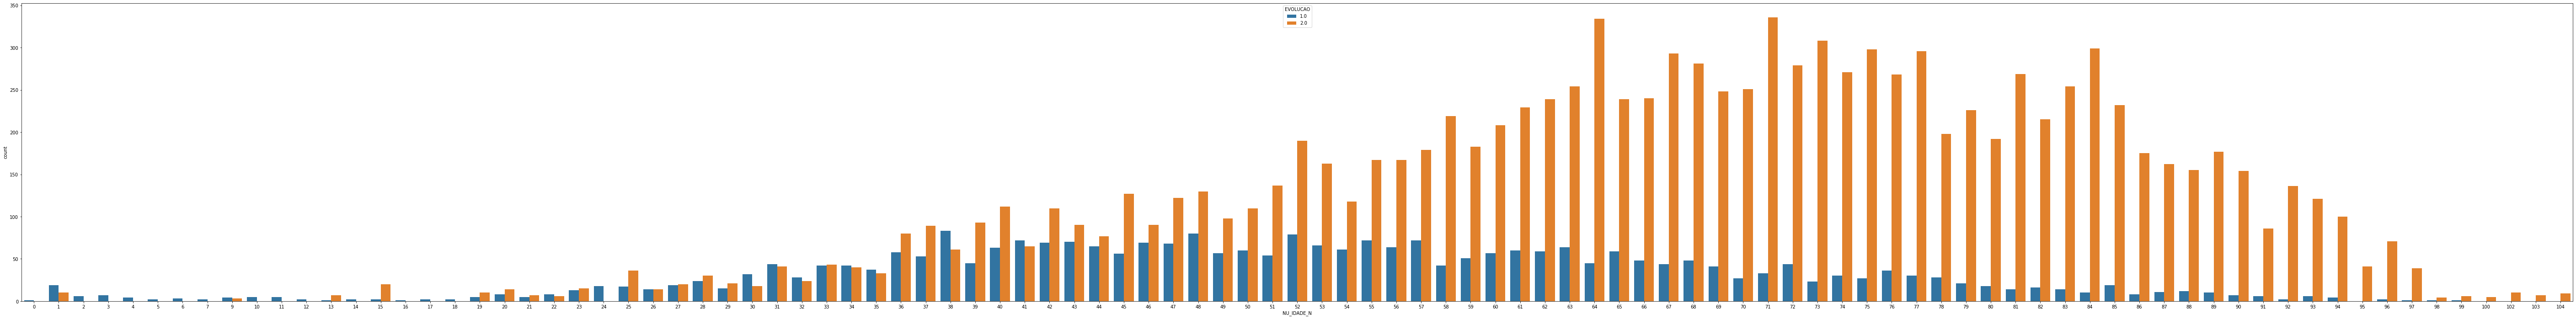

In [43]:
plt.figure(figsize = (100, 12))
sns.countplot(df_covid.NU_IDADE_N, hue=df_covid.EVOLUCAO)

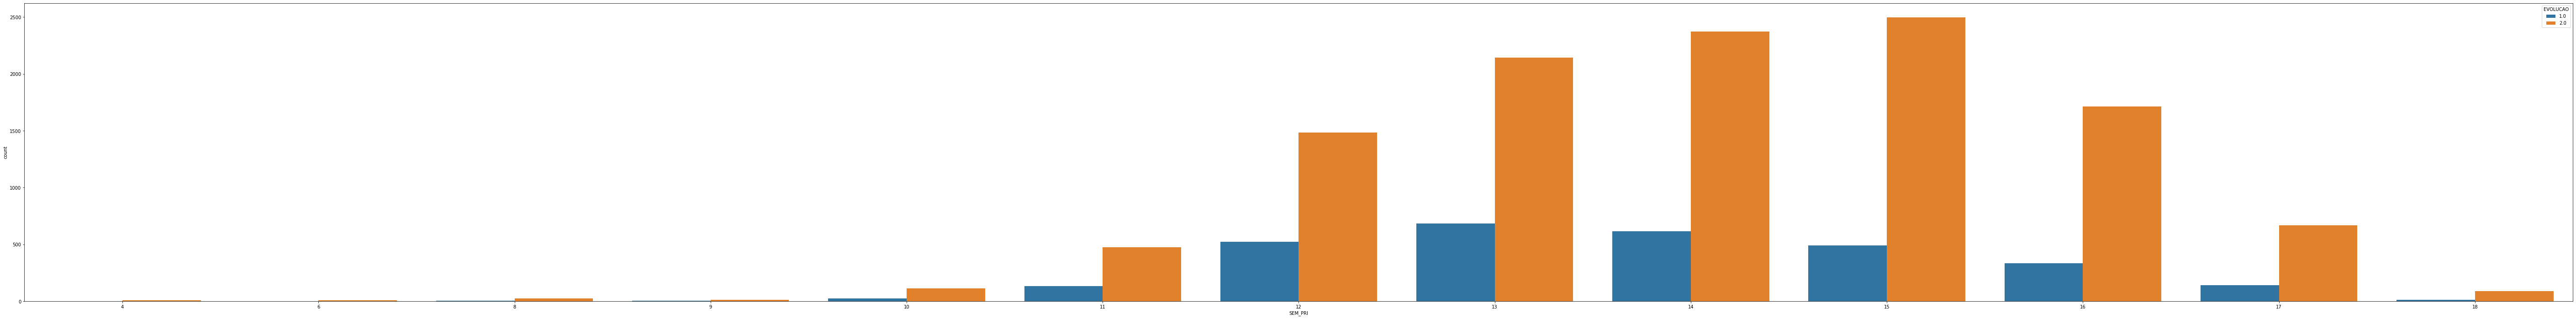

In [44]:
plt.figure(figsize = (100, 12))
sns.countplot(df_covid.SEM_PRI, hue=df_4.EVOLUCAO)

Text(0, 0.5, 'Quantidade')

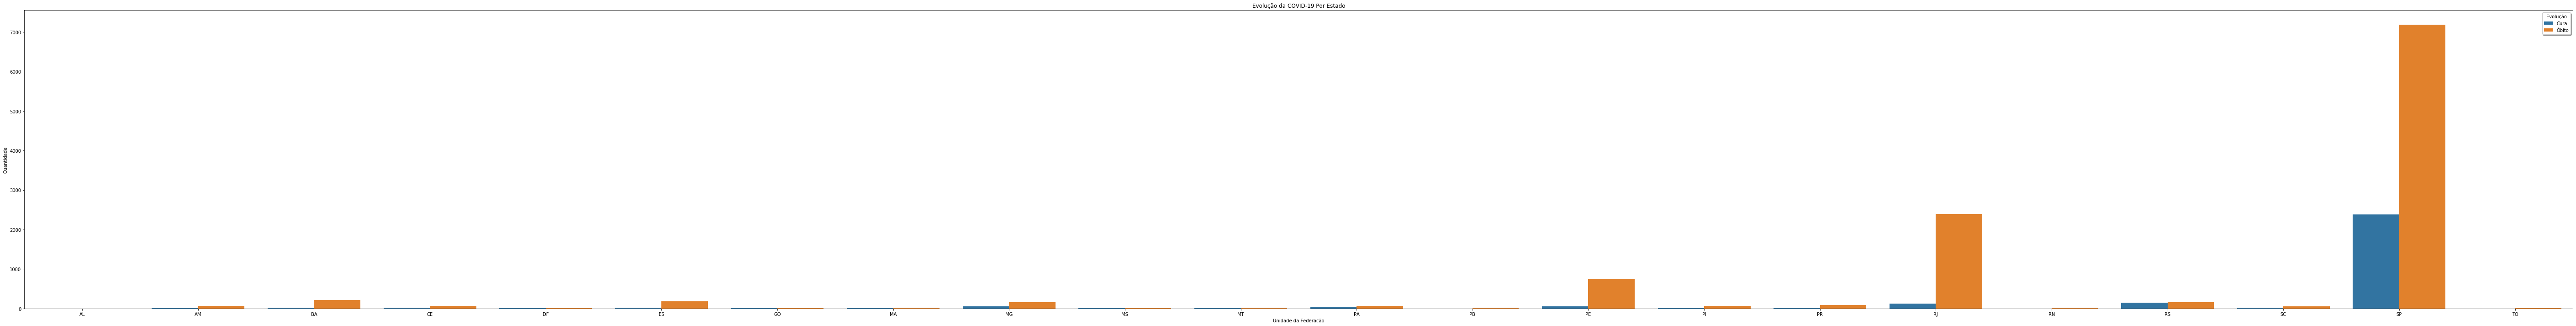

In [45]:
plt.rcParams["figure.figsize"] = (100, 12)

fig, ax = plt.subplots()
sns.countplot(df_covid.SG_UF_NOT, hue=df_4.EVOLUCAO).set_title('Evolução da COVID-19 Por Estado')

list_labels=[]
for x in ax.get_xticklabels():
    list_labels.append(int(x.get_text()))

    
xlabels = le.inverse_transform(list_labels)

ax.set_xticklabels(xlabels)

plt.legend(title='Evolução', loc='upper right', labels=['Cura', 'Óbito'], shadow=True)

ax.set_xlabel('Unidade da Federação')
ax.set_ylabel('Quantidade')
